## Imported the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style("darkgrid")

## Read the data as a data frame

In [2]:
insurance=pd.read_csv('insurance.csv')

####  * read_csv is a function of pandas which is used to read the comma-separated values (csv)  into a DataFrame.

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### * head() is used to returns first n (i.e. n=5) rows of a DataFrame

In [4]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603



#### * tail() is used to print the last n (i.e. n=5) rows of DataFrame

## EDA

### a. Shape of the data

In [5]:
insurance.shape

(1338, 7)

#### * shape prints the dimensional of a DataFrame in tuple type.

### b. Data type of each attribute

In [6]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### * dtypes prints  the datatype of each column in a  DataFrame.

### c. Checking the presence of missing values

In [7]:
insurance.isnull().values.any()

False

### * "False" indicates that the DataFrame has no null values

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### * info() method prints the information about a DataFrame with the dtype , columns, non-null values and memory usage. From this method  we can check the presence of missing values in Non-Null Count. 

In [9]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### * isnull() method returns the boolean result of each element in a DataFrame whereas isnull().sum() prints the sum of the null value against each columns in a Dataframe .

#### * The above each three statements states there is no null values present in dataframe

### d. 5 point summary of numerical attributes

In [10]:
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
insurance.describe().transpose()[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
age,18.0000,27.00000,39.000,51.000000,64.00000
bmi,15.9600,26.29625,30.400,34.693750,53.13000
children,0.0000,0.00000,1.000,2.000000,5.00000
charges,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### * insurance.describe() returns the 5 point summary along with count, mean and standard deviation
#### * insurance.describe().transpose()[['min','25%','50%','75%','max']] returns only 5 point summary .

### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

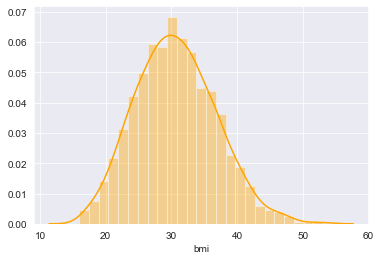

In [12]:
sns.distplot(insurance['bmi'],color='Orange');

### From the BMI distribution plot, we can infer that the data cumulation is around the bmi of 30

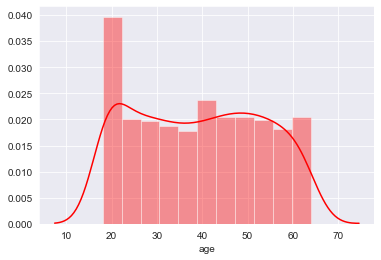

In [13]:
sns.distplot(insurance['age'],color='red');

### From the Age distribution plot, we can infer that the data cumulation is around the age of 20

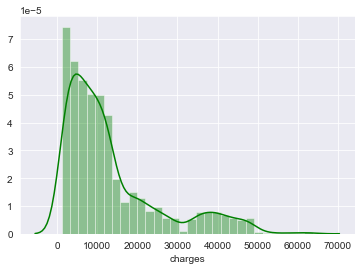

In [14]:
sns.distplot(insurance['charges'],color='green');

### From the Charges distribution plot, we can infer that the data cumulation at <10000 and it clearly stating the skewness as right skewed.

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns(2marks)

In [15]:
insurance['bmi'].skew()

0.2840471105987448

#### * Slightly Right Skewed
#### * A Skewness value of 0.284 of "bmi" is >0 and it denotes that the tail of distribution is larger towards right hand side than left hand side .

In [16]:
insurance['age'].skew()

0.05567251565299186

#### * Slightly Right Skewed
#### * A Skewness value of 0.055 of "age" is >0 and it denotes that the tail of distribution is slighltly larger towards right hand side than left hand side .

In [17]:
insurance['charges'].skew()

1.5158796580240388

#### * Heavily Right Skewed
#### * A Skewness value of 0.055 of "age" is >0 and it denotes that the tail of distribution is much more larger towards right hand side .

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

##### * Box plot is the graphical representation of 5 point summary
##### * Box plot shows the outliers as a data point that is located outside of boxplot
##### * Outliers are calculates by Q3+1.5* IQR at maximum and Q1-1.5*IQR at minimum

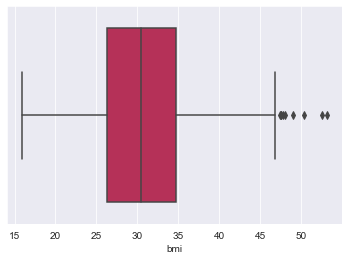

In [18]:
sns.boxplot(insurance['bmi'],palette='rocket');

### * There are enough outliers present in the column "bmi"

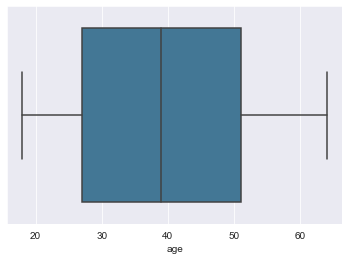

In [19]:
sns.boxplot(insurance['age'],palette='mako');

### * There is no outliers present in the column "age"

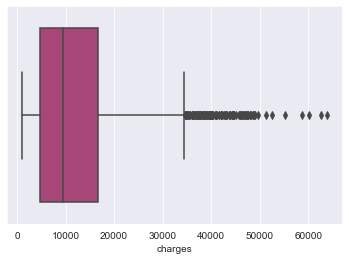

In [20]:
sns.boxplot(insurance['charges'],palette='magma');

### * There are ample number of  outliers present in the column "charges"

### h. Distribution of categorical columns (include children)

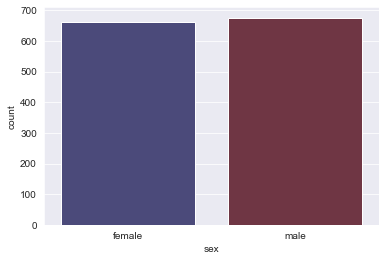

In [21]:
sns.countplot(insurance['sex'],palette='icefire');

#### * The above count plot is for the column "Sex" . We can quickly visualize,  Male is slightly higher when compared to Female .

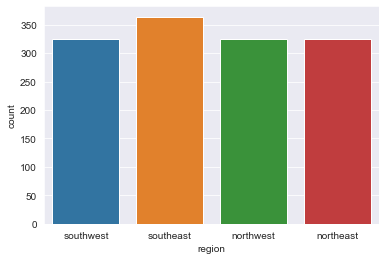

In [22]:
sns.countplot(insurance['region']);

#### * The above count plot is for the column "region". We can quickly visualize that the people from southeast is in larger count comparatively.

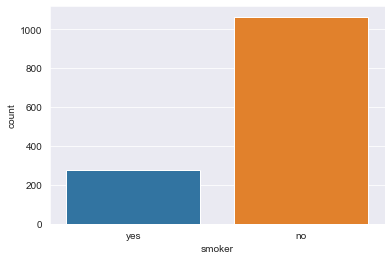

In [23]:
sns.countplot(insurance['smoker']);

#### * The above count plot is for the column "smoker". We can quickly visualize that the Non-Smoker Class is more compared to Smoker class

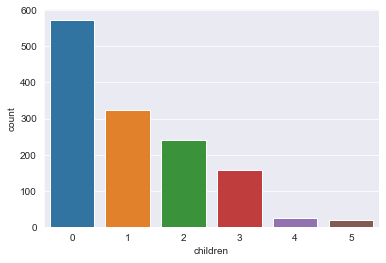

In [24]:
sns.countplot(insurance['children']);

#### * The above count plot is for the column "children". Inference stated below
###### => No children is more comparatively.
###### => 5 children is less comparatively.

### h. Pair plot that includes all the columns of the data frame (4 marks)

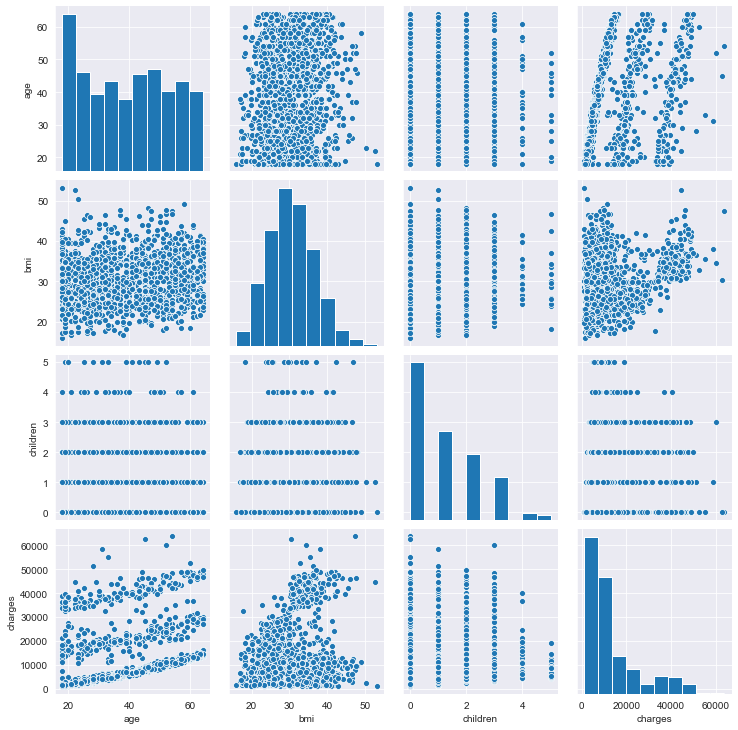

In [25]:
sns.pairplot(insurance); #Pair plot includes all numerical variables and gives relationship between two variables.

#### * The above pairplot take only quantative variables for plotting . To include all columns in DataFrame we go with pairgrid.

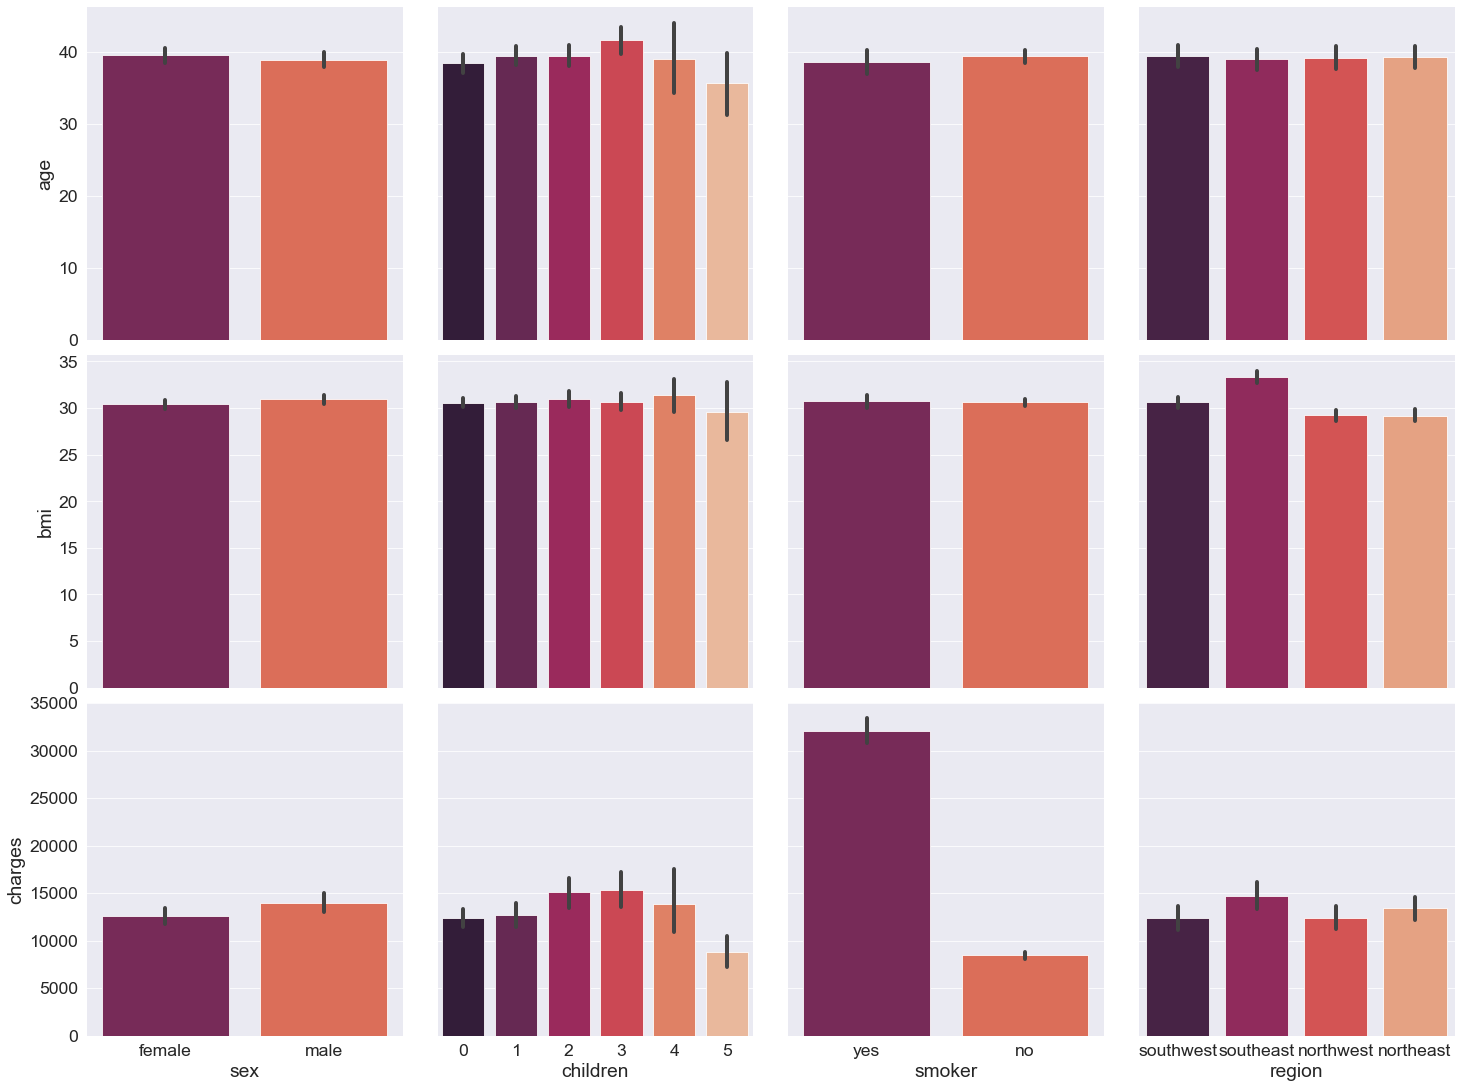

In [26]:
sns.set_context("paper", font_scale=2.0)
pg= sns.PairGrid(insurance, y_vars=['age','bmi','charges'],
                 x_vars=["sex", "children", "smoker", "region"],height=5);
pg.map(sns.barplot, errwidth=4, palette='rocket');

In [27]:
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.proportion import proportions_ztest 
from statsmodels.stats.weightstats import ztest
import statsmodels.api  as sm
from statsmodels.formula.api import ols

### Above, Imported all necessary package to proceed with Statistical evidence

# Statistical evidence

## a. Do charges of people who smoke differ significantly from the people who don't?

Declaring Null and Alternate Hypothesis to proceed Statistical test.

Ho= Charges for both Smoker People and Non-Smokers People are Equal (µ1=µ2 )

Ha = Charges for both Smoker & Non-Smokers People are not Equal which may greater or lesser (µ1>µ2 or µ1<µ2,) i.e(µ1!=µ2)

The Level Of Significance is set as 0.05 (i.e 95%)

In [28]:
# creating seperate dataframe for smokers
smokers=insurance[insurance['smoker']=='yes'].sample(n=150)
smokers=smokers['charges']
smokers.head()

271     42856.83800
759     36307.79830
1282    14283.45940
1049    39727.61400
1007    24915.22085
Name: charges, dtype: float64

In [29]:
smokers.shape

(150,)

In [30]:
#Creating seperate dataframe for Non-Smokers
nosmokers=insurance[insurance['smoker']=='no'].sample(n=150)
nosmokers=nosmokers['charges']
nosmokers.head()

844     10072.05505
751      1906.35825
35       1625.43375
1012    36580.28216
1005     4433.38770
Name: charges, dtype: float64

In [31]:
nosmokers.shape

(150,)

#### * In above, Selecting only 150 random records from Non-smokers and Smokers.
#### * Here to give a statistical evidence test, I go with Two sample T-test. 

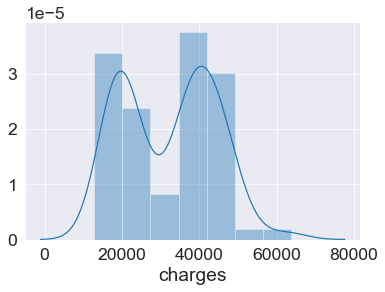

In [32]:
sns.distplot(smokers);

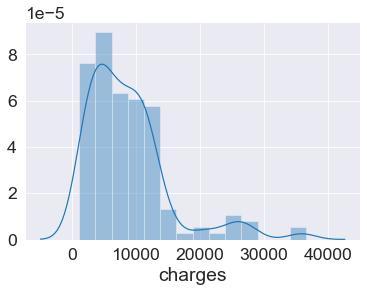

In [33]:
sns.distplot(nosmokers);

In [34]:
t,pval=ttest_ind(smokers,nosmokers)

In [35]:
print(t,pval)

21.15749591698627 2.665103193242466e-61


#### * The p-value  is significantly less than the 0.05 (level of significant). so, the null Hypothesis get rejected.
### * There is Significant Difference between the Charges for Smoker & Non-Smoker People

## b. Does bmi of males differ significantly from that of females?

Declaring Null and Alternate Hypothesis to proceed Statistical test.

Ho= BMI for Male Population and Female Population are Equal (µ1 =µ2 ).

Ha = BMI for Male Population and Female Population may greater or lesser (µ1>µ2 or µ1<µ2,) i.e(µ1!=µ2)

The Level Of Significance set as 0.05 (i.e 95%)

In [36]:
t_test,p=ttest_ind(insurance[insurance['sex']=='male']['bmi'].sample(500),insurance[insurance['sex']=='female']['bmi'].sample(500))

In [37]:
print(t_test,p) 

2.3213207026684852 0.02047019641757573


#### * Since the pvalue is greater then the level of significance(0.05), Failed to reject the Null Hypothesis.

### *  There is no Significant Difference between the BMI for Male Population and  Female Population.

## c. Is the proportion of smokers significantly different in different genders?

Ho= Proportion of Smokers in Male & Female are Equal

Ha = Proportion of Smokers in Male & Female may greater or lesser (µ1>µ2 or µ1<µ2,) i.e(µ1!=µ2)

The Level Of Significance set as 0.05 (i.e 95%)

In [38]:
smoker_male=insurance[insurance['smoker']=='yes']['sex'].value_counts()[0]
smoker_female=insurance[insurance['smoker']=='yes']['sex'].value_counts()[1]
no_of_male=insurance['sex'].value_counts()[0]
no_of_female=insurance['sex'].value_counts()[1]

In [39]:
print(no_of_male,smoker_male,":",no_of_female,smoker_female)

676 159 : 662 115


In [40]:
proptest,p=proportions_ztest([smoker_male,smoker_female] , [no_of_male, no_of_female])

In [41]:
print(proptest,p)

2.7867402154855503 0.005324114164320532


#### * Since the pvalue(0.005) is lesser then the level of significance(0.05), So we can reject the Null Hypothesis.

### *  The proportions of smoker has significant differencebetween genders.

## d. Is the distribution of bmi across women with no children, one child and two children, the same?

Declaring Null and Alternate Hypothesis to proceed Statistical test.

Ho= BMI across women with no children, one child and two children are the same (µ1 =µ2 ).

Ha = BMI across women with no children, one child and two children are not same (µ1!=µ2).

The Level Of Significance set as 0.05 (i.e 95%)

In [42]:
zero_children=insurance[(insurance['sex']=='female') & (insurance['children']==0)]['bmi'].values
one_children=insurance[(insurance['sex']=='female') & (insurance['children']==1)]['bmi'].values
two_children=insurance[(insurance['sex']=='female') & (insurance['children']==2)]['bmi'].values


In [43]:
bmi = pd.DataFrame()

df1 = pd.DataFrame({'children': '0', 'bmi':zero_children})
df2 = pd.DataFrame({'children': '1', 'bmi':one_children})
df3 = pd.DataFrame({'children': '2', 'bmi':two_children})

bmi= bmi.append(df1) 
bmi = bmi.append(df2) 
bmi = bmi.append(df3) 

In [44]:
res = ols('bmi ~ children', data = bmi).fit()
anova = sm.stats.anova_lm(res, typ=2)
print(anova)

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


####  * Since the pvalue(0.715858) is greater then the level of significance(0.05), So we fail to reject the Null Hypothesis.

###  * The BMI across Women with no children,one children & two Children are same